In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('WineQT.csv')

# Analyzing the data

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [12]:
#describing the data
data.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [13]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [14]:
#no null values are there

<Axes: >

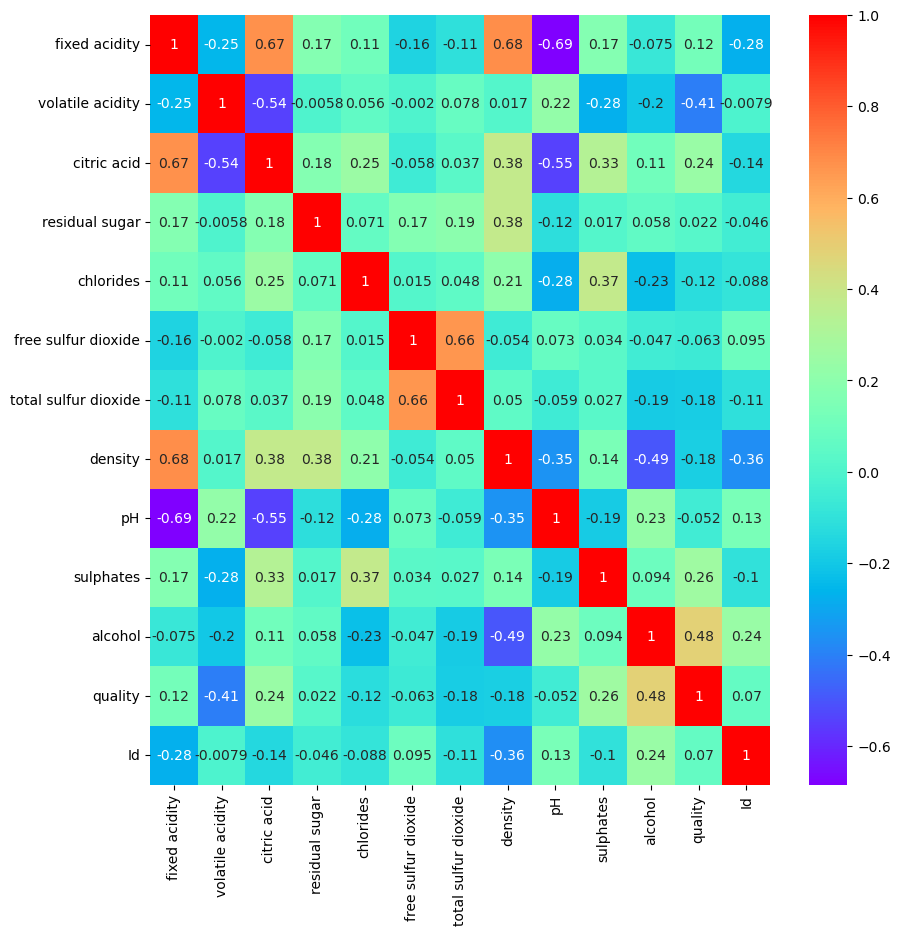

In [15]:
correlation = data.corr()
plt.figure(figsize = (10,10))
sns.heatmap(data = correlation,
           annot = True,
           cmap = 'rainbow')

# Visualizing the data

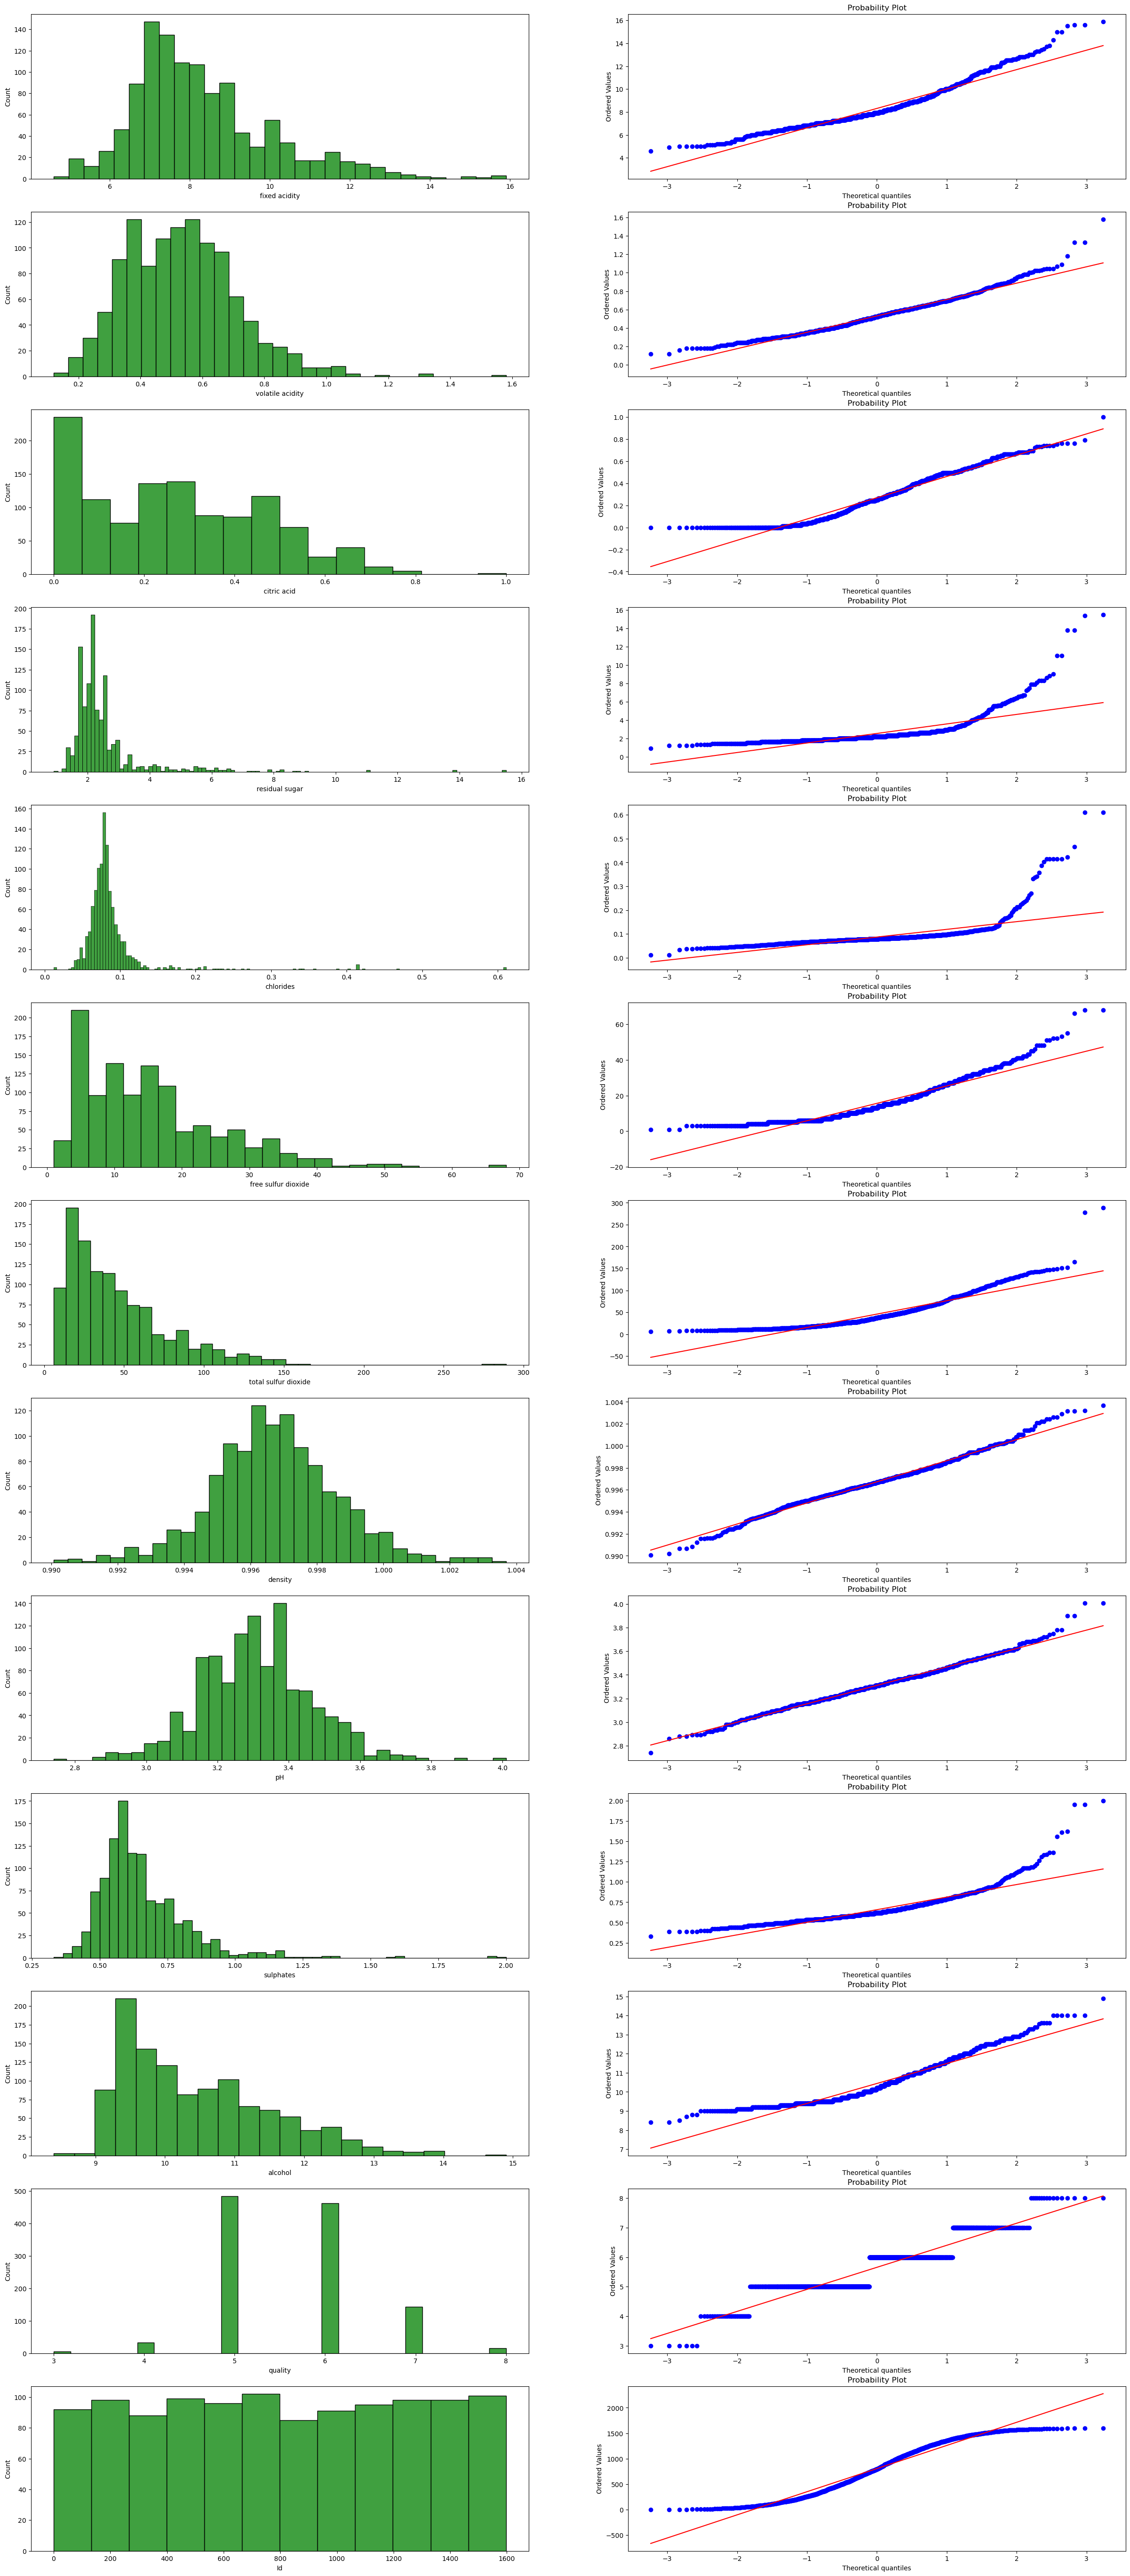

In [26]:
from scipy import stats

fig,ax = plt.subplots(13,2,figsize=(30,70))
for index,i in enumerate(data.columns):
    sns.histplot(data[i],ax=ax[index,0],color='green')
    stats.probplot(data[i],plot=ax[index,1])

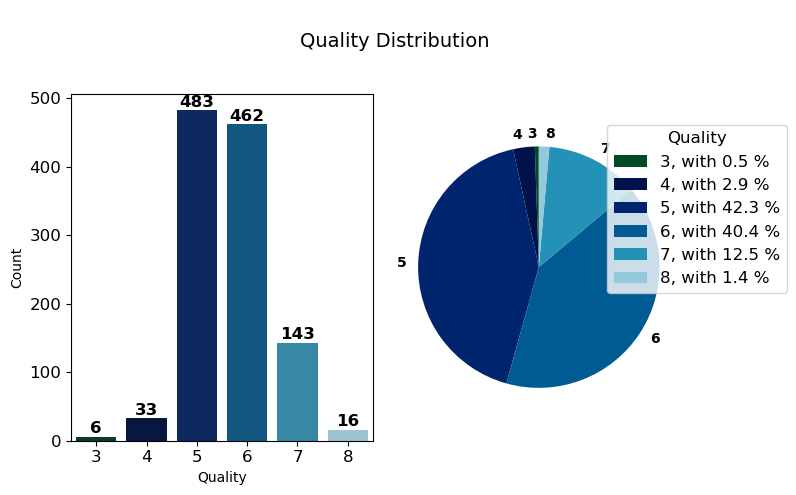

In [33]:
quality_counts = data['quality'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.suptitle("\nQuality Distribution\n", fontsize=14)

plt.subplot(1, 2, 1)
cmap = sns.color_palette('ocean')
bar_plot = sns.barplot(x=quality_counts.index, y=quality_counts.values, palette=cmap)
for i, v in enumerate(quality_counts.values):
    bar_plot.text(i, v + 5, str(v), color='black', fontweight='bold', ha='center', fontsize=12)
plt.xlabel('Quality', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.subplot(1, 2, 2)
wedges, texts = plt.pie(quality_counts.values, labels = quality_counts.index, 
                         colors=sns.color_palette(cmap, len(quality_counts)), 
                         startangle=90, textprops={'fontsize': 10})

for text in texts:
    text.set_fontweight('bold')

plt.legend(
    bbox_to_anchor=(1.35, 1),  
    loc="upper right",
    labels=['%s, with %1.1f %%' % (l, s) for l, s in zip(quality_counts.index, quality_counts.values / quality_counts.values.sum() * 100)],
    title="Quality",
    title_fontsize=12,
    fontsize=12,
)
plt.tight_layout()
plt.show()

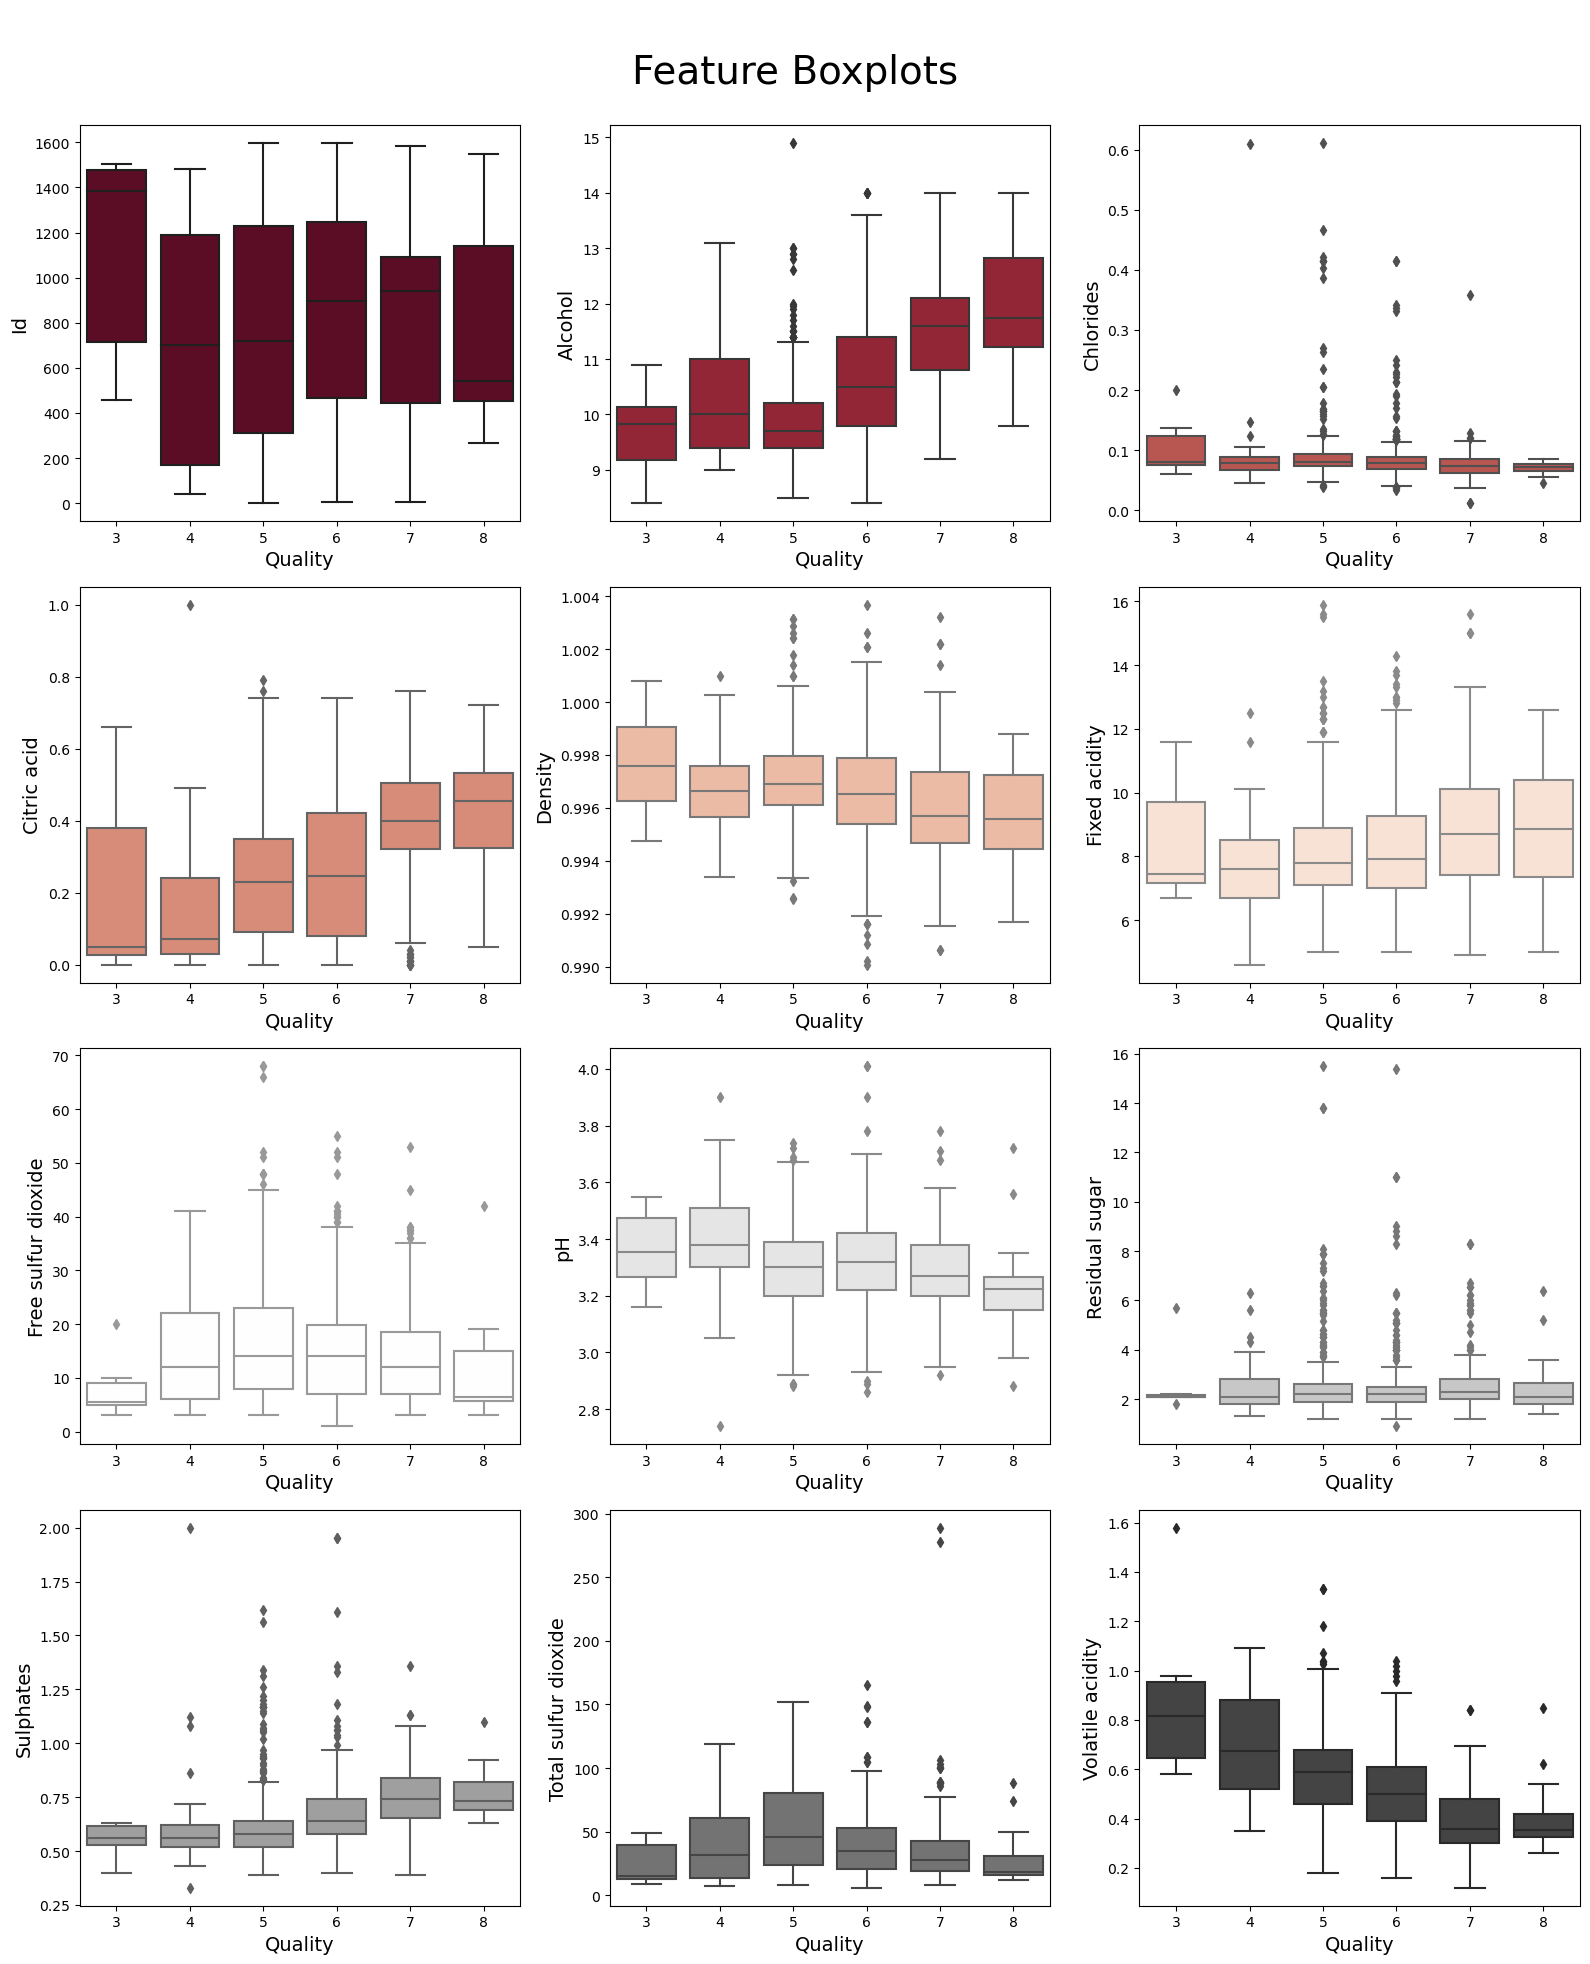

In [39]:
# Define a colormap https://r02b.github.io/seaborn_palettes/
import matplotlib as mpl
cmap = "RdGy"
cmap_obj = mpl.colormaps[cmap]
SEED = 99

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

cols = data.columns.difference(['quality'])

n_rows = (len(cols) // 3) if len(cols) % 3 == 0 else (len(cols) // 3) + 1
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, n_rows*5))
if n_rows * n_cols > len(cols):
    for i in range(len(cols), n_rows * n_cols):
        fig.delaxes(axs.flatten()[i])

fig.suptitle("\nFeature Boxplots\n", fontsize=28)
for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(x=data['quality'], y=data[col], color=cmap_obj(i/len(cols)))
    plt.xlabel('Quality', fontsize=14)
    
    if col.lower() != "ph":
        col = col.capitalize().replace("_", " ")
    plt.ylabel(col, fontsize=14)

plt.tight_layout()
plt.show()

In [41]:
def outlier_detection(df, column):
    z_scores = np.abs(stats.zscore(df[column]))
    df = df[(z_scores < 3)]
    print(column,'has',len(np.where(z_scores>3)[0]),'outliers')
    return df

In [42]:
for column in data.columns:
    df = outlier_detection(data, column)


fixed acidity has 9 outliers
volatile acidity has 5 outliers
citric acid has 1 outliers
residual sugar has 23 outliers
chlorides has 21 outliers
free sulfur dioxide has 13 outliers
total sulfur dioxide has 10 outliers
density has 12 outliers
pH has 5 outliers
sulphates has 21 outliers
alcohol has 7 outliers
quality has 6 outliers
Id has 0 outliers


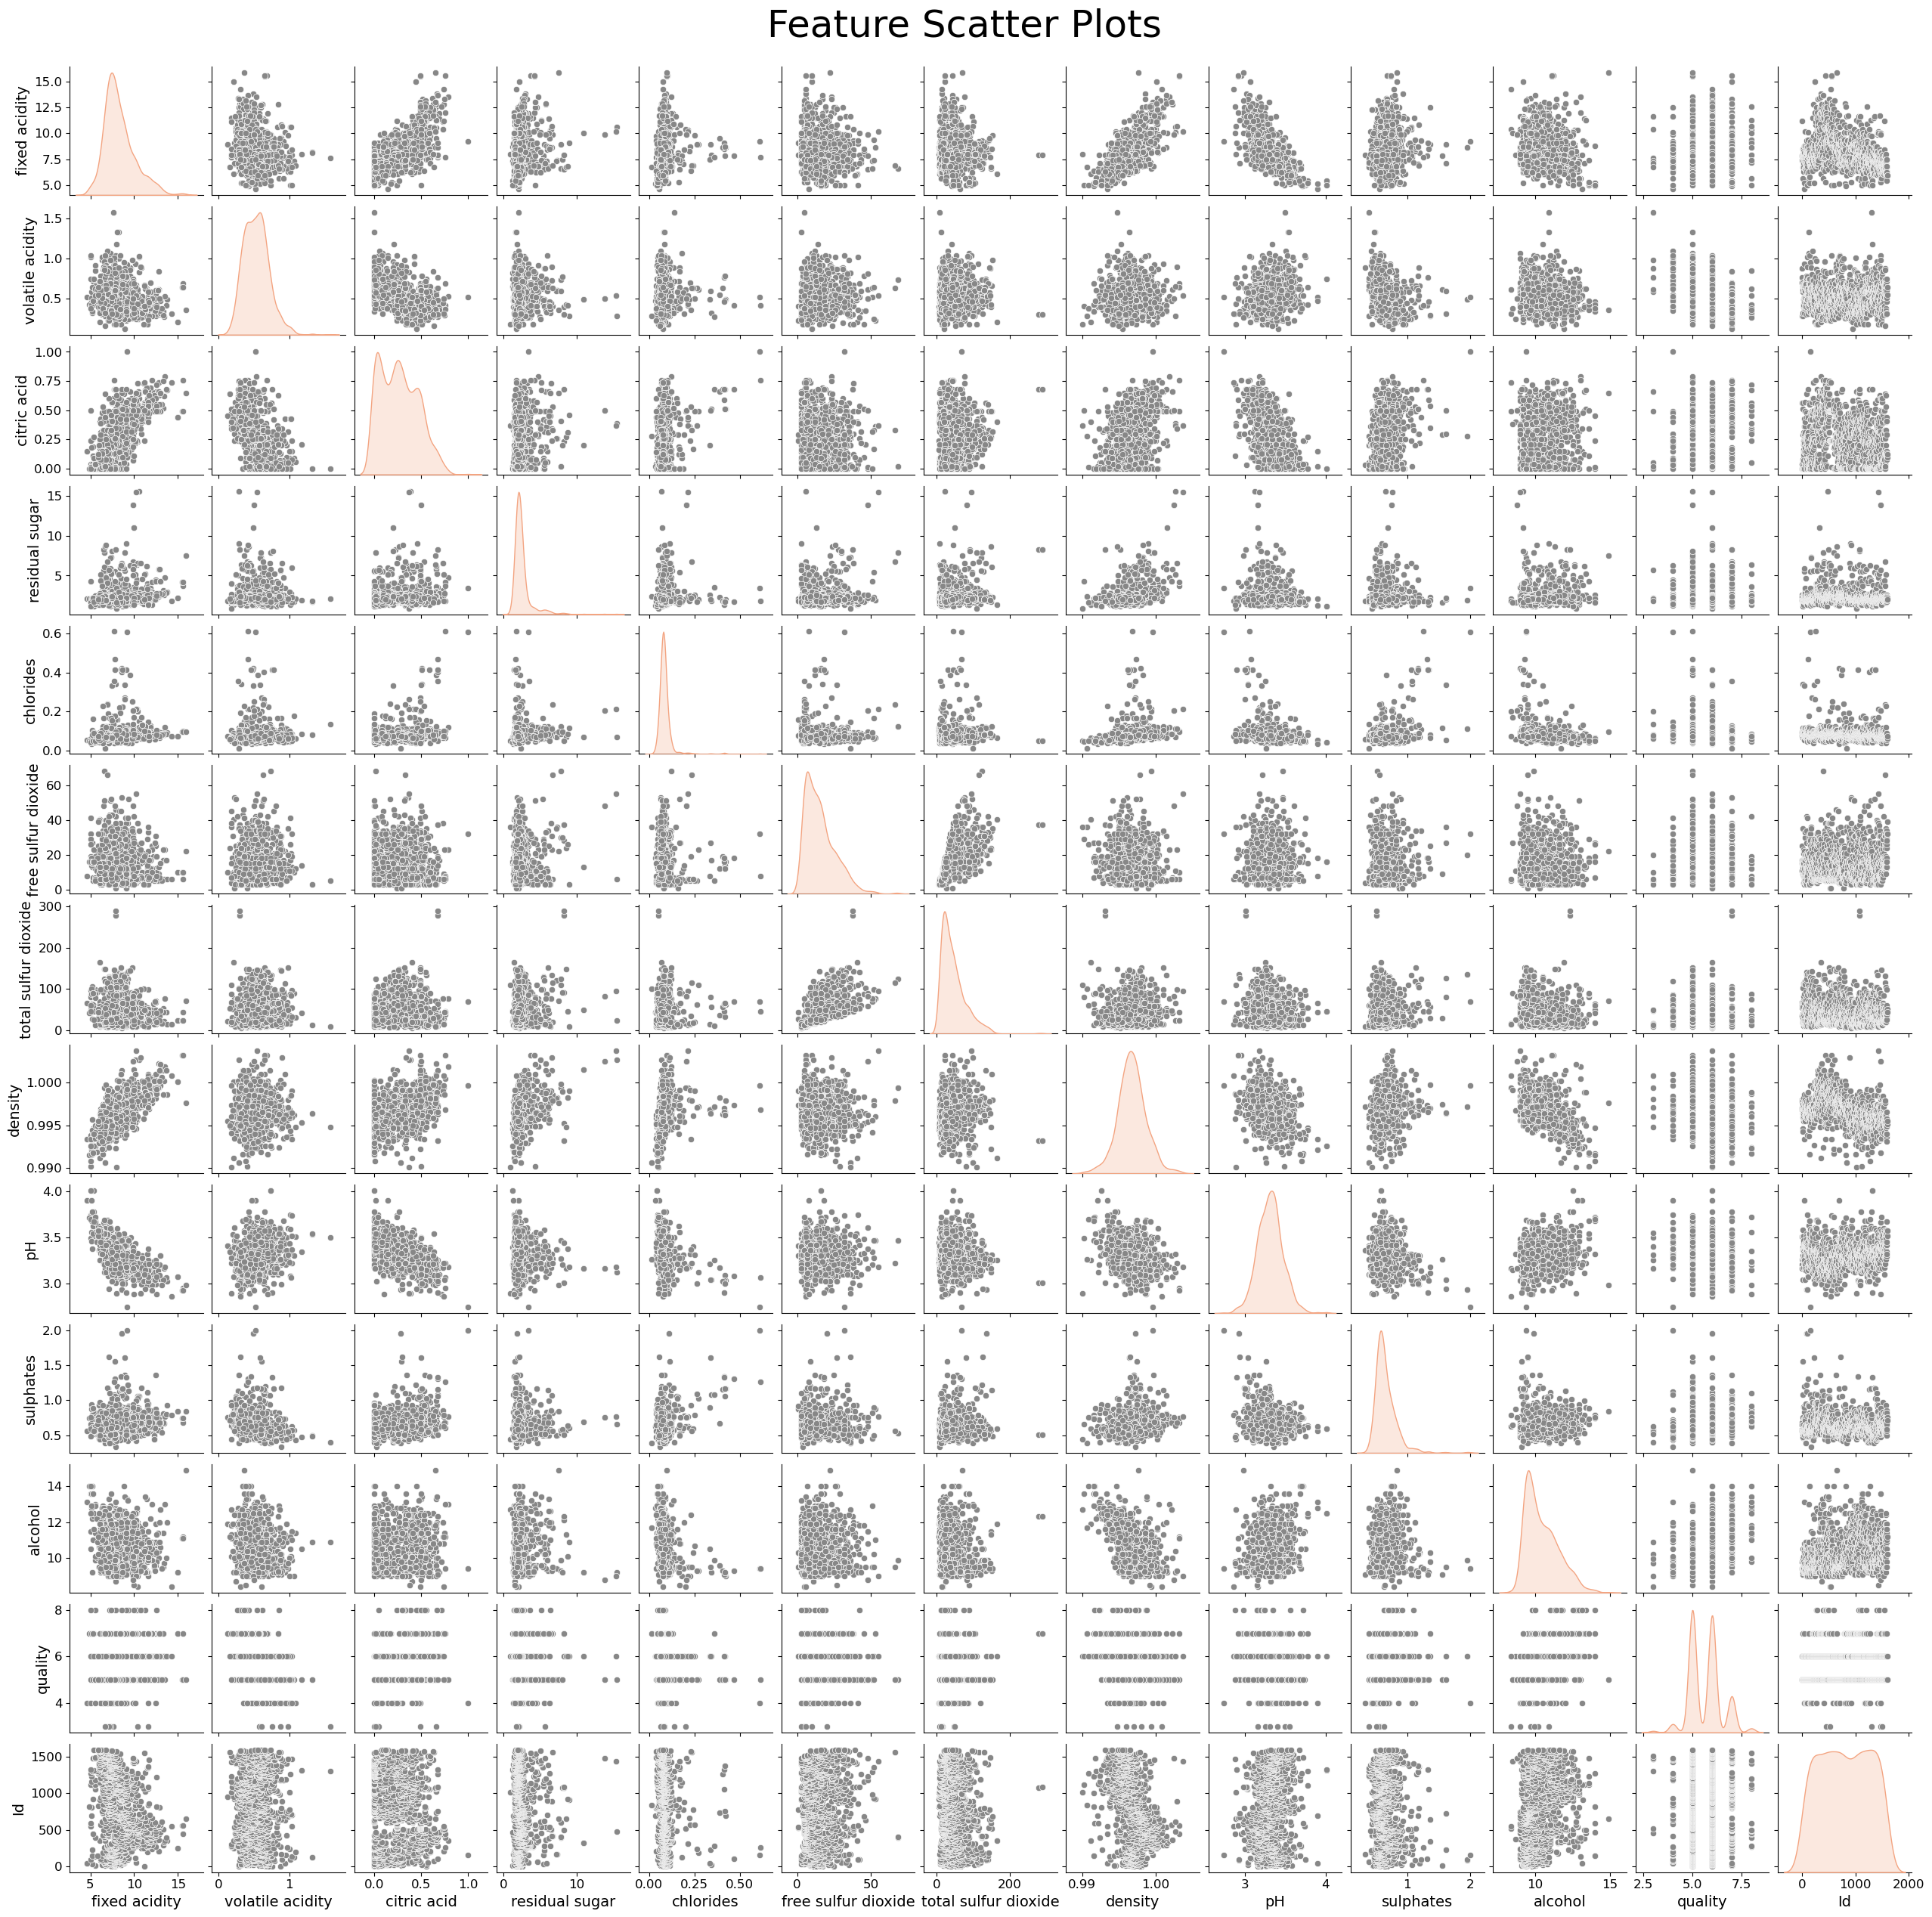

In [40]:
g = sns.pairplot(data, height=2, kind='scatter', diag_kind='kde', plot_kws={'color': cmap_obj(0.8)}, diag_kws={'color': cmap_obj(0.3)})
for ax in g.axes.flatten():
    ax.tick_params(labelsize=12)

plt.subplots_adjust(top=0.95)
plt.suptitle('Feature Scatter Plots', size=36)
plt.show()

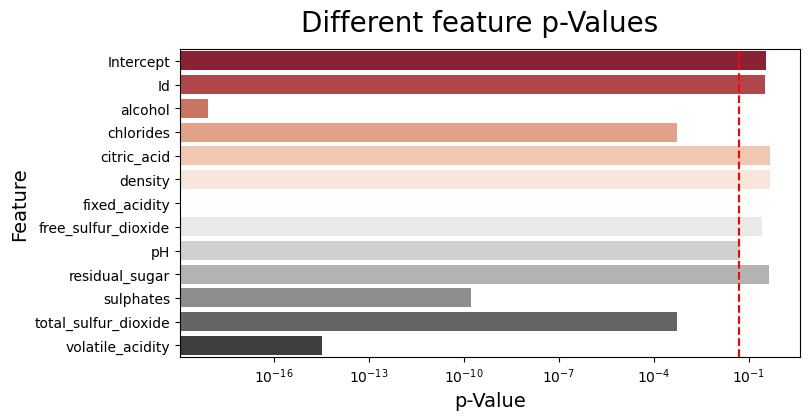

In [47]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

data.columns = data.columns.str.replace(' ', '_')

cols = data.columns.difference(['quality'])
formula = "quality ~ " + " + ".join(cols)
model = ols(formula, data=data).fit()

pvalues = pd.DataFrame(model.pvalues).reset_index()
pvalues.columns = ['Feature', 'p-value']

plt.figure(figsize=(8,4))
bar_plot = sns.barplot(data=pvalues, x='p-value', y='Feature', palette=cmap_obj.name)
plt.xscale('log')
plt.suptitle('Different feature p-Values', fontsize=20)
plt.axvline(x=0.05, color='red', linestyle='--') 
plt.xlabel("p-Value")
plt.show()

# machine learning model

In [51]:
#building a linear regression model
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [63]:
X=df.drop(['quality'],axis =1)
y=df['quality']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=11)

print('shape of training data :' , X_train.shape)
print('shape of test data :', X_test.shape)


shape of training data : (914, 12)
shape of test data : (229, 12)


In [57]:
scale = StandardScaler()
X_train = scale.fit(X_train)
X_test = scale.fit(X_test)

In [64]:
#LR regressor model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [70]:
print('Linear Regression intercept: ',model.intercept_)

Linear Regression intercept:  4.238818071724642


In [75]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df


,Coefficient
fixed acidity,-0.002337
volatile acidity,-1.149740
citric acid,-0.178541
residual sugar,-0.008819
chlorides,-1.800000
free sulfur dioxide,0.003009
total sulfur dioxide,-0.003151
density,0.723075
pH,-0.588876
sulphates,0.777993


In [76]:
#predicting the results
predictions = model.predict(X_test)


# model evaluation

In [77]:
from sklearn import metrics
import numpy as np 

print('Mean Absolute Error     :', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error      :', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error     : 0.4867583886843365
Mean Squared Error      : 0.38382405245214085
Root Mean Squared Error : 0.6195353520600264


In [81]:
from sklearn.metrics import r2_score , f1_score

r2_score_with_test = r2_score(y_test,predictions)

predictions_rounded = np.round(predictions).astype(int)
f1score = f1_score(y_test,predictions_rounded, average='macro')

print('r2 score :',r2_score_with_test)
print('F1 score :',f1score)

r2 score : 0.4105278177636411
F1 score : 0.27060924973153544


RESULT WITH TESTED DATA
Number of data test:  229


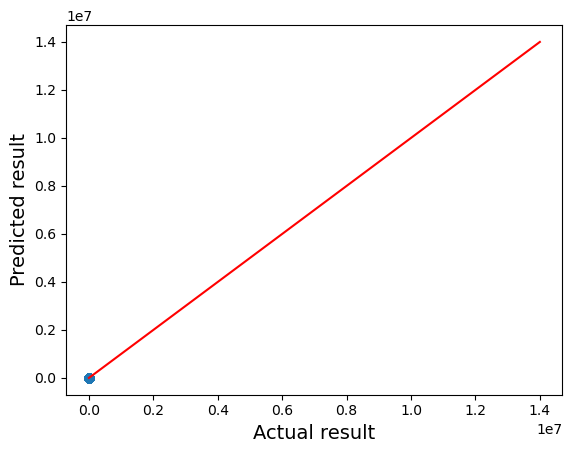

In [88]:
import matplotlib.pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel("Actual result")
plt.ylabel("Predicted result")
x_point = np.array([0,14000000])
y_point = np.array([0,14000000])
plt.plot(x_point, y_point, c = 'r')
print("RESULT WITH TESTED DATA")
print("Number of data test: ", len(X_test))
plt.show()